In [8]:
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("cameronseamons/electronic-sales-sep2023-sep2024")
df = pd.read_csv(path + '\Electronic_sales_Sep2023-Sep2024.csv')
df.head(10)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
5,1004,41,Female,No,Smartphone,SKU1001,5,Completed,Credit Card,83.00,20.75,4,2024-05-26,Standard,"Impulse Item,Accessory",65.78
6,1005,25,Female,No,Smartwatch,SKU1003,3,Completed,Paypal,7603.47,844.83,9,2024-01-30,Overnight,NaN,0.00
7,1005,25,Female,No,Laptop,SKU1005,3,Completed,Debit Card,4175.64,463.96,9,2024-06-24,Overnight,"Extended Warranty,Extended Warranty",75.33
8,1006,24,Male,No,Smartphone,SKU1004,2,Cancelled,Debit Card,5538.33,791.19,7,2023-10-03,Standard,Impulse Item,43.05
9,1006,24,Male,Yes,Laptop,SKU1005,3,Completed,Cash,4175.64,463.96,9,2024-01-01,Express,NaN,0.00


In [18]:
df_cust = df.groupby('Customer ID').agg({
  'Payment Method': lambda x: x.mode().iloc[0], 
  'Total Price': 'sum',
  'Add-on Total': 'sum' 
}).reset_index()

df_cust.head()

,Customer ID,Payment Method,Total Price,Add-on Total
0,1000,Credit Card,6279.42,66.30
1,1002,Cash,5020.60,60.16
2,1003,Cash,41.50,35.56
3,1004,Credit Card,83.00,65.78
4,1005,Debit Card,11779.11,75.33


In [21]:
df_ship = df.groupby('Shipping Type').agg({
  'Total Price': 'sum',
  'Add-on Total': 'sum' 
}).reset_index()

df_ship.head()

,Shipping Type,Total Price,Add-on Total
0,Expedited,12437526.21,271505.46
1,Express,8685215.62,140687.85
2,Overnight,8704828.17,139033.20
3,Same Day,12432024.82,269538.06
4,Standard,21343073.55,424132.39


In [26]:
df_product = df.groupby('Product Type').agg({
  'Total Price': 'sum',
  'Add-on Total': 'sum' 
}).reset_index()

df_product.head()

,Product Type,Total Price,Add-on Total
0,Headphones,4041400.24,166182.32
1,Laptop,12296239.97,250025.31
2,Smartphone,21516754.69,331025.55
3,Smartwatch,14036273.06,241423.36
4,Tablet,11712000.41,256240.42


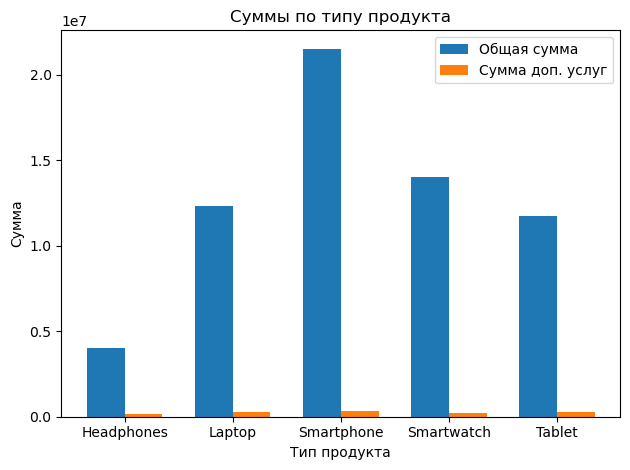

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Подготовка данных
labels = df_product['Product Type']
total_values = df_product['Total Price']
extra_values = df_product['Add-on Total']

x = np.arange(len(labels)) # позиция каждого бар-чарта
bar_width = 0.35 # ширина каждой колонки

# Создание графика
plt.bar(x - bar_width/2, total_values, bar_width, label='Общая сумма')
plt.bar(x + bar_width/2, extra_values, bar_width, label='Сумма доп. услуг')

# Настройка графика
plt.xlabel('Тип продукта')
plt.ylabel('Сумма')
plt.title('Суммы по типу продукта')
plt.xticks(x, labels)
plt.legend()

# Показ графика
plt.tight_layout()
plt.show()